In [1]:
import numpy
numpy.__version__
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Returns an array of zeroes (50 * 100000)
data = np.zeros((50., 1.e5))

#Loops over each set of 100000 zeroes (i.e 50 times)
for i, dump in enumerate(data):
    #Random (poisson) values
    data[i] = scipy.stats.poisson.rvs(mu=i+1.e-5, size=len(dump))

def DetChance(mu, DetChance=np.zeros(100)):
    """Calculates chance of detection?
    """
    if mu==0.:
        return DetChance[0]
    else:
        NEvents = np.array(range(len(DetChance)))
        value = DetChance * scipy.stats.poisson.pmf(NEvents, mu)
        return np.sum(value) + scipy.stats.poisson.sf(NEvents[-1], mu)

#Calculates the alpha-th percentile of the Test statistic results, as a threshold
alpha = 50.
beta = 90.
lambda_thres = np.percentile(data[0], alpha)

#Creates a zero-array, and fills it with the percentile of each result
DetChanceArray = np.zeros(len(data))
for i, dump in enumerate(DetChanceArray):
    DetChanceArray[i] = 1. - scipy.stats.percentileofscore(data[i], lambda_thres)/100.

In [3]:
#Finds the sensitivity (beta(90%) chance of detection)  

f = lambda x: DetChance(x, DetChance=DetChanceArray) - beta/100.
sens = scipy.optimize.bisect(f, 0., 100., )

2.54571230323


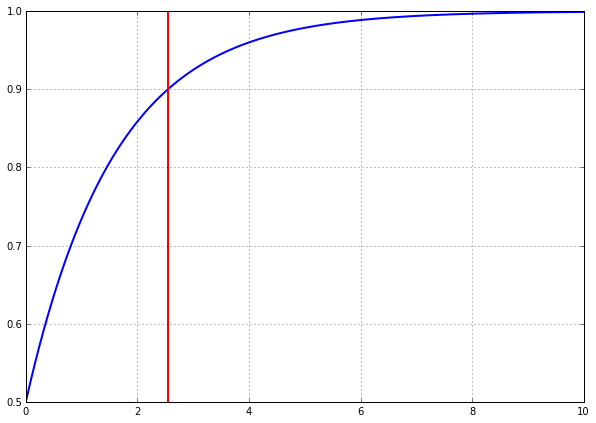

In [4]:
#Plots detection probability as a function of n_s
x = np.linspace(0., 10., 1000.+1)
y = np.array([DetChance(z,  DetChance=DetChanceArray) for z in x])

print sens
plt.figure(figsize=(10, 7))
plt.plot(x, y, lw=2)
plt.axvline(x=sens, lw=2, color='red')
plt.grid()
plt.show()